In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y=x.pow(2) + 0.2*torch.rand(x.size())
x.shape

torch.Size([100, 1])

In [3]:
X=Variable(x,requires_grad=True )
Y=Variable(y)

In [4]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        super(Net, self).__init__()
        self.hidden1=torch.nn.Linear(n_feature, n_hidden1)
        self.hidden2=torch.nn.Linear(n_hidden1, n_hidden2)
        self.output=torch.nn.Linear(n_hidden2, n_output)
        
        
    def forward(self, x):
        x= F.relu(self.hidden1(x))
        x= F.relu(self.hidden2(x))
        x= self.output(x)
        return x
    

In [5]:
net=Net(n_feature=1, n_hidden1=10, n_hidden2=10, n_output=1)
print(net)

Net(
  (hidden1): Linear(in_features=1, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)


In [6]:
optimizer=torch.optim.Adam(net.parameters(), lr=0.2)
loss_func= torch.nn.MSELoss()

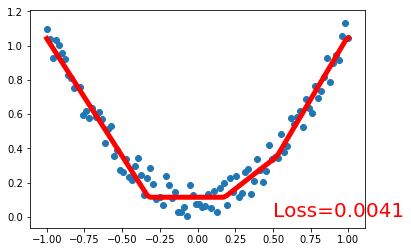

In [13]:
for t in range(300):
    prediction=net(X)
    
    loss=loss_func(prediction, Y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    plt.cla()
    plt.scatter(X.data.numpy(), Y.data.numpy())
    plt.plot(X.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
    

In [8]:
#sometimes when running these cells we get a straight line in in loss function graph so i need to restart the kernel

In [9]:
torch.linspace?

In [10]:
torch.nn.Linear?